In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
df=pd.read_csv("fra_cleaned.csv", sep=';' , encoding='latin-1')
df.head()

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,"mainaccord5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,"
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento-overdose-pride-edition,xerjoff,Italy,unisex,"1,42",201,2022.0,"fruity notes, aldehydes, green notes","bulgarian rose, egyptian jasmine, lily-of-the-...","eucalyptus, pine",unknown,NaN,rose,woody,fruity,aromatic,"floral,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
1,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2024,jean-paul-gaultier,France,women,"1,86",70,2024.0,"yuzu, citruses","orange blossom, neroli","musk, blonde woods",unknown,NaN,citrus,white floral,sweet,fresh,"musky,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
2,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2023,jean-paul-gaultier,France,unisex,"1,91",285,2023.0,"blood orange, yuzu","neroli, orange blossom","musk, white woods",natalie gracia-cetto,quentin bisch,citrus,white floral,sweet,fresh spicy,"musky,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
3,https://www.fragrantica.com/perfume/bruno-bana...,pride-edition-man,bruno-banani,Germany,men,"1,92",59,2019.0,"guarana, grapefruit, red apple","walnut, lavender, guava","vetiver, benzoin, amber",unknown,NaN,fruity,nutty,woody,tropical,",,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."
4,https://www.fragrantica.com/perfume/jean-paul-...,le-male-pride-collector,jean-paul-gaultier,France,men,"1,93",632,2020.0,"mint, lavender, cardamom, artemisia, bergamot","caraway, cinnamon, orange blossom","vanilla, sandalwood, amber, cedar, tonka bean",francis kurkdjian,NaN,aromatic,warm spicy,fresh spicy,cinnamon,"vanilla,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,..."


# Data Cleaning

In [32]:
df.rename(
    columns={
        "mainaccord5,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,": "mainaccord5"
    },
    inplace=True,
)
df["mainaccord5"] = df["mainaccord5"].str.replace(",", "")
df["Rating Value"] = df["Rating Value"].str.replace(",", ".")
df["Rating Value"] = df["Rating Value"].astype(float)
df.head()

,url,Perfume,Brand,Country,Gender,Rating Value,Rating Count,Year,Top,Middle,Base,Perfumer1,Perfumer2,mainaccord1,mainaccord2,mainaccord3,mainaccord4,mainaccord5
0,https://www.fragrantica.com/perfume/xerjoff/ac...,accento-overdose-pride-edition,xerjoff,Italy,unisex,1.42,201,2022.0,"fruity notes, aldehydes, green notes","bulgarian rose, egyptian jasmine, lily-of-the-...","eucalyptus, pine",unknown,NaN,rose,woody,fruity,aromatic,floral
1,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2024,jean-paul-gaultier,France,women,1.86,70,2024.0,"yuzu, citruses","orange blossom, neroli","musk, blonde woods",unknown,NaN,citrus,white floral,sweet,fresh,musky
2,https://www.fragrantica.com/perfume/jean-paul-...,classique-pride-2023,jean-paul-gaultier,France,unisex,1.91,285,2023.0,"blood orange, yuzu","neroli, orange blossom","musk, white woods",natalie gracia-cetto,quentin bisch,citrus,white floral,sweet,fresh spicy,musky
3,https://www.fragrantica.com/perfume/bruno-bana...,pride-edition-man,bruno-banani,Germany,men,1.92,59,2019.0,"guarana, grapefruit, red apple","walnut, lavender, guava","vetiver, benzoin, amber",unknown,NaN,fruity,nutty,woody,tropical,
4,https://www.fragrantica.com/perfume/jean-paul-...,le-male-pride-collector,jean-paul-gaultier,France,men,1.93,632,2020.0,"mint, lavender, cardamom, artemisia, bergamot","caraway, cinnamon, orange blossom","vanilla, sandalwood, amber, cedar, tonka bean",francis kurkdjian,NaN,aromatic,warm spicy,fresh spicy,cinnamon,vanilla


#Column Details

URL: Same as the raw dataset, the link to the fragrance's page.

Perfume: The name of the fragrance.

Brand: Standardized names of the fragrance brands.

Country: Standardized country names for easier analysis.

Gender: Cleaned and unified categories for the fragrance’s marketed gender (e.g., men, women, unisex).

Rating Value: Cleaned numeric ratings (decimal format).

Rating Count: Standardized rating counts.

Year: The launch year in a cleaned and unified format.

Top Notes: Parsed and standardized scent notes.

Middle Notes: Parsed and standardized middle notes.

Base Notes: Parsed and standardized base notes.

Perfumer1, Perfumer2: Standardized and separated names of the perfumers.

Main Accord 1-5: Cleaned and separated into distinct scent families.

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24063 entries, 0 to 24062
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url           24063 non-null  object 
 1   Perfume       24063 non-null  object 
 2   Brand         24063 non-null  object 
 3   Country       24063 non-null  object 
 4   Gender        24063 non-null  object 
 5   Rating Value  24063 non-null  float64
 6   Rating Count  24063 non-null  int64  
 7   Year          22026 non-null  float64
 8   Top           24063 non-null  object 
 9   Middle        24063 non-null  object 
 10  Base          24063 non-null  object 
 11  Perfumer1     24063 non-null  object 
 12  Perfumer2     1336 non-null   object 
 13  mainaccord1   24063 non-null  object 
 14  mainaccord2   24050 non-null  object 
 15  mainaccord3   23949 non-null  object 
 16  mainaccord4   23675 non-null  object 
 17  mainaccord5   24063 non-null  object 
dtypes: float64(2), int64(1), o

In [34]:
df.nunique()

url             24063
Perfume         22840
Brand            1060
Country            54
Gender              3
Rating Value      221
Rating Count     2721
Year              145
Top             18771
Middle          19690
Base            16393
Perfumer1         869
Perfumer2         259
mainaccord1        66
mainaccord2        71
mainaccord3        72
mainaccord4        69
mainaccord5        78
dtype: int64

In [35]:
print(df.isna().sum())

url                 0
Perfume             0
Brand               0
Country             0
Gender              0
Rating Value        0
Rating Count        0
Year             2037
Top                 0
Middle              0
Base                0
Perfumer1           0
Perfumer2       22727
mainaccord1         0
mainaccord2        13
mainaccord3       114
mainaccord4       388
mainaccord5         0
dtype: int64


In [36]:

# Categorize rows into 'Null' and 'Not Null' based on 'Year'
df["Year_Status"] = df["Year"].apply(lambda x: "Null" if pd.isnull(x) else "Not Null")

# Calculate average rating for each Year_Status group
result = df.groupby("Year_Status")["Rating Value"].mean().reset_index()

# Display the result
print(result)

  Year_Status  Rating Value
0    Not Null      3.960260
1        Null      3.961669


In [37]:
df = df.dropna(subset=["Year"])

# EDA

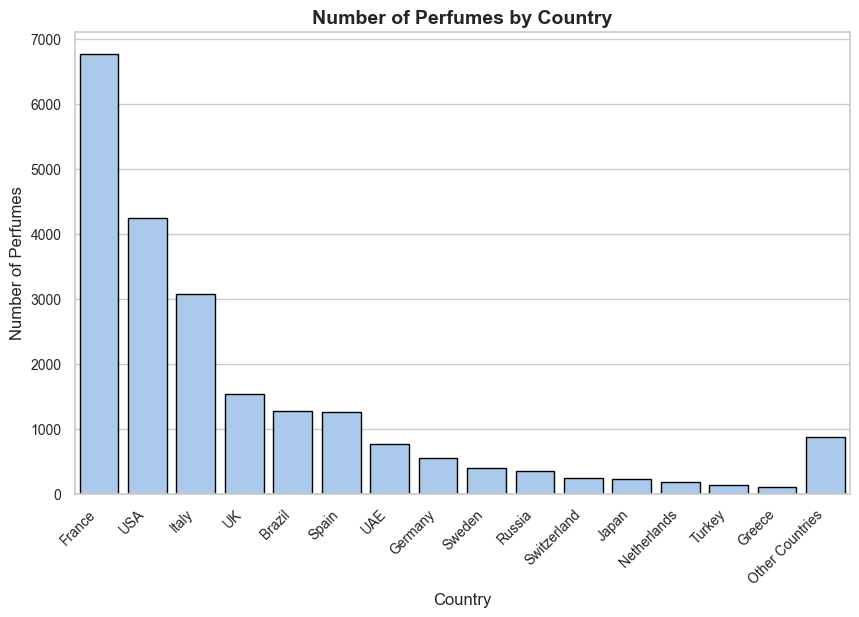

In [38]:
grouped_data = df.groupby("Country").size().reset_index(name="Number of Perfumes")

# Sort and pick the top 10 countries
top_15 = grouped_data.nlargest(15, "Number of Perfumes")
other_countries = grouped_data[~grouped_data["Country"].isin(top_15["Country"])]
other_row = pd.DataFrame({
    "Country": ["Other Countries"],
    "Number of Perfumes": [other_countries["Number of Perfumes"].sum()]
})

# Combine the top 10 with "Other Countries"
final_data = pd.concat([top_15, other_row], ignore_index=True)

# Plotting
plt.figure(figsize=(10, 6))
sns.set_theme(style="whitegrid", palette="pastel")
sns.barplot(data=final_data, x="Country", y="Number of Perfumes", edgecolor="black")
plt.title("Number of Perfumes by Country", fontsize=14, weight="bold")
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Perfumes", fontsize=12)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10)
plt.show()

In [ ]:
import pandas as pd
import bar_chart_race as bcr

# Preprocessing to prepare the data
# Group by Year and Country to count the number of perfumes
year_country_counts = df.groupby(['Year', 'Country']).size().unstack(fill_value=0)

# Restrict to top 10 countries overall
top_10_countries = year_country_counts.sum().nlargest(10).index
filtered_data = year_country_counts[top_10_countries]

# Ensure the years are sorted
filtered_data = filtered_data.sort_index()

# Generate the bar chart race
bcr.bar_chart_race(
    df=filtered_data,
    filename=None,  # None means it will display in the notebook
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    # fixed_max=True,
    steps_per_period=10,
    interpolate_period=True,
    title='Year-wise Top 10 Countries by Perfume Count',
    bar_size=0.95,
    bar_label_size=7,
    period_length=650,
    tick_label_size=7,
    cmap='pastel',
    dpi=150,
    period_label={'x': 0.95, 'y': 0.2, 'ha': 'right', 'va': 'center', 'fontsize': 12},
)


C:\Users\alaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(self.df_values.columns)
C:\Users\alaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


In [40]:
year_country_counts = df.groupby(['Year', 'Country']).size().unstack(fill_value=0)

# Restrict to top 10 countries overall
top_10_countries = year_country_counts.sum().nlargest(10).index
filtered_data = year_country_counts[top_10_countries]

# Ensure the years are sorted
filtered_data = filtered_data.sort_index()

# Generate the bar chart race
bcr.bar_chart_race(
    df=filtered_data,
    filename='Top10_Countries_Timeseries.mp4',  # None means it will display in the notebook
    orientation='h',
    sort='desc',
    n_bars=10,
    fixed_order=False,
    # fixed_max=True,
    steps_per_period=10,
    interpolate_period=True,
    title='Year-wise Top 10 Countries by Perfume Count',
    bar_size=0.95,
    bar_label_size=7,
    period_length=650,
    tick_label_size=7,
    cmap='pastel',
    dpi=150,
    period_label={'x': 0.95, 'y': 0.2, 'ha': 'right', 'va': 'center', 'fontsize': 12},
)


C:\Users\alaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_make_chart.py:286: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(self.df_values.columns)
C:\Users\alaha\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\bar_chart_race\_make_chart.py:287: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([max_val] * len(ax.get_xticks()))


# Training Model

In [43]:
columns=list(df.columns)
print(columns)

['url', 'Perfume', 'Brand', 'Country', 'Gender', 'Rating Value', 'Rating Count', 'Year', 'Top', 'Middle', 'Base', 'Perfumer1', 'Perfumer2', 'mainaccord1', 'mainaccord2', 'mainaccord3', 'mainaccord4', 'mainaccord5', 'Year_Status']


In [53]:
df['description'] = (
    df[['Top', 'Middle', 'Base', 'mainaccord1', 'mainaccord2', 'mainaccord3', 'mainaccord4', 'mainaccord5']]
    .fillna('')  
    .agg(' '.join, axis=1)  
)
df['description'] = df['description'].str.lower()  


In [55]:
def filter_perfumes(gender, brand, description):
    filtered_df = df[df['Gender'].str.lower() == gender_input]
    
    if brand:
        filtered_df = filtered_df[filtered_df['Brand'].str.lower() == brand]

    # Check if filtered_df has data
    if filtered_df.empty:
        print("No perfumes found matching the criteria. Please try different inputs.")
    else:
        # Vectorize text using TF-IDF
        vectorizer = TfidfVectorizer(stop_words='english')
        tfidf_matrix = vectorizer.fit_transform(filtered_df['description'])

        # Vectorize user input
        user_vector = vectorizer.transform([user_input])

        # Compute cosine similarity
        similarity_scores = cosine_similarity(user_vector, tfidf_matrix)

        # Find the closest matching perfumes
        top_matches = np.argsort(similarity_scores[0])[::-1][:5]  # Top 5 matches

        # Display the results
        print("\nTop matching perfumes based on your description:")
        for i, idx in enumerate(top_matches, 1):
            match = filtered_df.iloc[idx]
            perfume_name = match['Perfume']
            url = match['url']
            brand = match['Brand']
            rating_value = match['Rating Value']
            rating_count = match['Rating Count']
            description = match['description']
            similarity = similarity_scores[0][idx]

            print(f"\n{i}. {perfume_name} (Similarity: {similarity:.2f})")
            print(f"   Brand: {brand}")
            print(f"   Rating: {rating_value} (based on {rating_count} ratings)")
            print(f"   URL: {url}")
            print(f"   Description: {description}")


In [56]:
gender_input = input("Enter gender (e.g., men, women, unisex): ").strip().lower()
brand_input = input("Enter brand name (optional, leave blank if none): ").strip().lower()
user_input = input("Describe your ideal perfume (e.g., citrus, floral, vanilla): ").lower()

filter_perfumes(gender_input, brand_input, user_input)


Top matching perfumes based on your description:

1. 000 (Similarity: 0.55)
   Brand: le-monde-gourmand
   Rating: 4.07 (based on 57 ratings)
   URL: https://www.fragrantica.com/perfume/le-monde-gourmand/000-81931.html
   Description: bergamot, freesia water lily sandal woody floral citrus powdery fresh spicy

2. r2b2-crypto (Similarity: 0.48)
   Brand: reyane-tradition
   Rating: 4.53 (based on 40 ratings)
   URL: https://www.fragrantica.com/perfume/reyane-tradition/r2b2-crypto-82734.html
   Description: mint, bergamot, grapefruit marine notes, orange blossom patchouli, sandal, vetiver, amber aromatic woody green citrus patchouli

3. aqua-allegoria-forte-rosa-palissandro (Similarity: 0.45)
   Brand: guerlain
   Rating: 3.53 (based on 302 ratings)
   URL: https://www.fragrantica.com/perfume/guerlain/aqua-allegoria-forte-rosa-palissandro-83015.html
   Description: coriander, lemon, aldehydes damask rose, palisander rosewood, geranium sandal, patchouli woody rose aromatic warm spicy fre

# Spark code


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count

In [20]:
spark = SparkSession.builder \
    .appName("PerfumeRecommendation") \
    .config("spark.executor.extraJavaOptions", "-Djava.security.manager=allow") \
    .config("spark.driver.extraJavaOptions", "-Djava.security.manager=allow") \
    .getOrCreate()


In [21]:
spark_df = spark.createDataFrame(df, columns)

# Count repetitions in the 'Perfume' column
repeating_perfume = spark_df.groupBy("Perfume") \
                      .agg(count("Perfume").alias("Count")) \
                      .filter(col("Count") > 1)

# Join with original DataFrame to get corresponding 'url' values
result = repeating_perfume.join(spark_df, on="Perfume", how="inner")

In [22]:
result.show()

+-------------+-----+--------------------+--------------------+-------+------+------------+------------+------+--------------------+--------------------+--------------------+--------------------+---------------+------------+------------+------------+------------+-----------+
|      Perfume|Count|                 url|               Brand|Country|Gender|Rating Value|Rating Count|  Year|                 Top|              Middle|                Base|           Perfumer1|      Perfumer2| mainaccord1| mainaccord2| mainaccord3| mainaccord4|mainaccord5|
+-------------+-----+--------------------+--------------------+-------+------+------------+------------+------+--------------------+--------------------+--------------------+--------------------+---------------+------------+------------+------------+------------+-----------+
|         hope|    2|https://www.fragr...|         orlov-paris| France| women|         3,5|          42|2020.0|violet leaf, pink...|peach, osmanthus,...|musk, cedar, patc..

In [23]:
result.printSchema()

root
 |-- Perfume: string (nullable = true)
 |-- Count: long (nullable = false)
 |-- url: string (nullable = true)
 |-- Brand: string (nullable = true)
 |-- Country: string (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Rating Value: string (nullable = true)
 |-- Rating Count: long (nullable = true)
 |-- Year: double (nullable = true)
 |-- Top: string (nullable = true)
 |-- Middle: string (nullable = true)
 |-- Base: string (nullable = true)
 |-- Perfumer1: string (nullable = true)
 |-- Perfumer2: string (nullable = true)
 |-- mainaccord1: string (nullable = true)
 |-- mainaccord2: string (nullable = true)
 |-- mainaccord3: string (nullable = true)
 |-- mainaccord4: string (nullable = true)
 |-- mainaccord5: string (nullable = true)



In [24]:
result.count()

2043